# Simple Linear Regression:
* For this task we'll be using Scikit-Learn package for machine learning.
* This task contains two variavles, viz. Hours and Scores
* Hours is Predictor and Scores is our target variable.

# Author:
**Abhay Mhatre**

# Loading Required Libraries:

In [2]:
# To supress warnings:
import warnings
warnings.filterwarnings('ignore')

# basic libraries:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Fixing Plot size:
plt.rcParams['figure.figsize'] = [15, 8]

# Train Test Split:
from sklearn.model_selection import train_test_split

# Linear Regression:
from sklearn.linear_model import LinearRegression

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score



# Loading Dataset from external Link:

In [3]:
df1 = pd.read_csv('http://bit.ly/w-data')
df1.sample(5)

,Hours,Scores
22,3.8,35
4,3.5,30
10,7.7,85
14,1.1,17
1,5.1,47


## Exploring Dataset's Metadata:

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df1.shape

(25, 2)

# Checking For Null Values:

In [4]:
df1.isnull().sum()

Hours     0
Scores    0
dtype: int64

* There are no Null values present in the data.

# Visualization:

## Checking Correlation between Predictor and Target:
* Correlation tells us not only direction but also magnitude of how strong the correlation is.

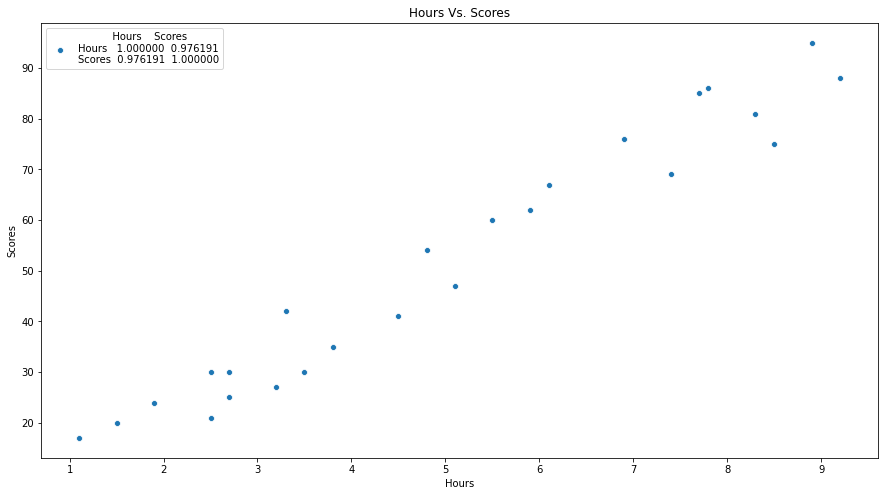

In [10]:
sns.scatterplot(x = 'Hours', y = 'Scores', data= df1, markers = 'o', label = '{}'.format(df1.corr()))
plt.title("Hours Vs. Scores")
plt.show()

* From above plot we can say that there is strong positive correlation between Hours and Scores.

## Distribution of Hours:

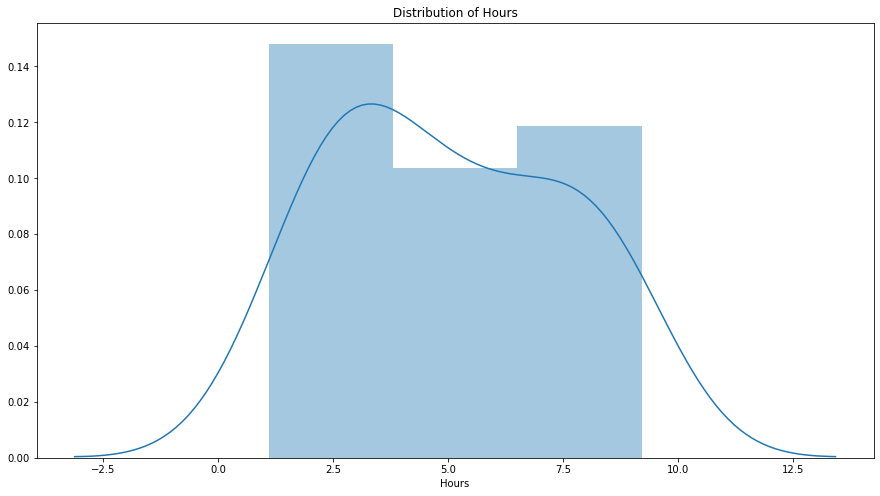

In [11]:
sns.distplot(df1['Hours'])
plt.title("Distribution of Hours")
plt.show()

* The predictors is nearly normally distributed.

# Preparing the Data:
* Here the data is divided into input variables and target variable.

In [12]:
X = df1['Hours']
y = df1['Scores']

# Train Test Split:
* Here we'll divide the data in train and test set.

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Using random state helps us in comparing different models on later stage as  the data remains the same for training for different sets of algorithms

# Building Model:


In [26]:
# Creating Machine Learing object:
lr = LinearRegression()
lr.fit(pd.DataFrame(xtrain), ytrain)

LinearRegression()

# Model Evaluation:

In [27]:
train_pred = lr.predict(pd.DataFrame(xtrain))
test_pred = lr.predict(pd.DataFrame(xtest))

In [28]:
print("R2_score =", r2_score(ytrain, train_pred))

R2_score = 0.9515510725211552


* This means that 95.15% of values are explained by our model.

In [29]:
print("Train RMSE =", np.sqrt(mean_squared_error(ytrain, train_pred)))
print("Test RMSE =", np.sqrt(mean_squared_error(ytest, test_pred)))

Train RMSE = 5.558613350226342
Test RMSE = 4.6474476121003665


* As we can see the Train and Test RMSE are closer to each other, that means our model is not overfitting.

# What will be predicted score if a student studies for 9.25 hrs/day?

In [36]:
hours = np.array(9.25)
pred = lr.predict(hours.reshape(1, -1))
print("If a student studies for {}hrs/day, that student can score {}.".format(hours, pred[0]))

If a student studies for 9.25hrs/day, that student can score 93.69173248737538.
